# Recognizing my own handwritten digits through neural networks.


In this project we will train a Fully Connected and Convolutional Neural Network (FCNN and CNN) through the [MNIST]([http://yann.lecun.com/exdb/mnist/]) dataset, and analyse their accuracy in recognizing my own digits. The MNIST dataset consist of a training and test set of, respectively, 60,000 and 10,000 handwritten digits collected by the United States National Institute of Standards and Technology. Since all of these data are all size normalized, and centered in fixed size images, Will the neural networks be efficient to recognize digits that were not submited to the same procedures as the training dataset? 


In addition, other answer we aim to answer in this project is: "If we shift my digits up and down, does the prediction of both of the neural networks change? Why?". We could expect that for the CNN the predictions should not change, since this model is local invariant, while the FCNN would probably show a different behavior. So, let's check this empirically!       

### Importing modules

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPool2D, BatchNormalization
import matplotlib.pyplot as plt 
from keras.utils import to_categorical
 

### Loading the MNIST and my digits data

Each of my own 10 handwritten digits of 28x28 pixels size images were previously converted to an greyscale array of size (28,28) and written in the file "mydigits.txt". So now we will read this data and also the MNIST digits array.

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test)=mnist.load_data()

mydata=open('mydigits.txt', 'r')
x_my=np.loadtxt(mydata).reshape(10,28,28)

# Normalize the train dataset
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_my = tf.keras.utils.normalize(x_my, axis=1)
y_my=np.array([0,1,2,3,4,5,6,7,8,9])

print("Shape of the training data: {}".format(np.shape(x_train)))
print("Shape of the test data: {}".format(np.shape(x_test)))
print('Shape of my own data: {}'.format(np.shape(x_my)))

### Building the FCNN Architecture

<img src="DNN-architecture-1.jpg" width="500" height="500" align="left"/>

Above it is possible to visualize the architecture chosen below for the Dense Network. First, a flatten layer was added to the model, so the 2-dimensional array of shape 28x28 could be converted to a 1-dimensional array of size 784, and used as an input layer that have one neuron for each pixel of the image arrays. After this, a dense layer was added, with hidden layer containing 128 neurones with relu activation function. Finally, the decision making proccess of the neural network was submited to an output layer with softmax activation function and 10 neurones, one for each of the possible digits. Most of the parameters were arbitrarily chosen and experimentally verified in a way that the network could present at least 96% accuracy for the test data. More accurate models of DNN are possible to build, but that is outside the scope of this project. 

In [3]:
#Build the model object
model1 = Sequential()

# Add the Flatten Layer
model1.add(Flatten(input_shape=(28,28)))

# Build the hidden layer
model1.add(Dense(128, activation=tf.nn.relu))

# Build the output layer
model1.add(Dense(10, activation=tf.nn.softmax))

# Compile the model
model1.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

### Building the CNN Architecture

If you look to the CNN architecture below, it is possible to notice that the last two layers are identical to the previous architecture. So we are basically taking the previous network and adding some different types of layers before it, which are the convolutional and Maxpooling layers. These procedures are responsible to extract local features from the images

In [4]:
#Loading the data for the CNN network
x_train2 = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test2 = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_my2=x_my.reshape(x_my.shape[0], 28, 28, 1)

model2=Sequential()


model2.add(Conv2D(24,kernel_size=5,padding='same',activation='relu',input_shape=(28,28,1)))
model2.add(MaxPool2D())
    
model2.add(Conv2D(48,kernel_size=5,padding='same',activation='relu'))
model2.add(MaxPool2D())
    
model2.add(Conv2D(64,kernel_size=5,padding='same',activation='relu'))
model2.add(MaxPool2D(padding='same'))
model2.add(Flatten())

model2.add(Dense(128, activation='relu'))
model2.add(Dense(10, activation='softmax'))

model2.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

### Training the FCNN

Epoch 1/10
1875/1875 [==============================] - 2s 946us/step - loss: 0.3710 - accuracy: 0.8982 - val_loss: 86.2539 - val_accuracy: 0.9157
Epoch 2/10
1875/1875 [==============================] - 2s 862us/step - loss: 0.1839 - accuracy: 0.9472 - val_loss: 86.1982 - val_accuracy: 0.9252
Epoch 3/10
1875/1875 [==============================] - 2s 884us/step - loss: 0.1338 - accuracy: 0.9607 - val_loss: 69.7905 - val_accuracy: 0.9397
Epoch 4/10
1875/1875 [==============================] - 2s 933us/step - loss: 0.1048 - accuracy: 0.9690 - val_loss: 70.2580 - val_accuracy: 0.9412
Epoch 5/10
1875/1875 [==============================] - 2s 932us/step - loss: 0.0857 - accuracy: 0.9751 - val_loss: 70.8481 - val_accuracy: 0.9428
Epoch 6/10
1875/1875 [==============================] - 2s 941us/step - loss: 0.0721 - accuracy: 0.9783 - val_loss: 78.5051 - val_accuracy: 0.9457
Epoch 7/10
1875/1875 [==============================] - 2s 949us/step - loss: 0.0610 - accuracy: 0.9814 - val_loss: 77

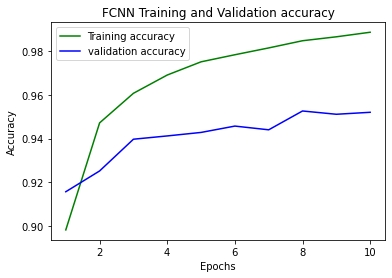

In [5]:
epochs=10
history1=model1.fit(x=x_train,y=y_train, epochs=epochs, validation_data=(x_test,y_test))

loss_train = history1.history['accuracy']
loss_val = history1.history['val_accuracy']
epochs = range(1,epochs+1)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('FCNN Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


### Testing the FCNN with my digits

Accuracy with my digits
1/1 [==============================] - 0s 1ms/step - loss: 3.3347 - accuracy: 0.5000


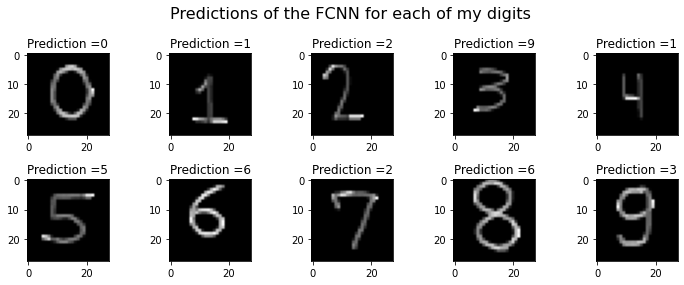

In [6]:

print('Accuracy with my digits')
model1.evaluate(x_my, y_my)

num_row=2
num_col=5
fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_col,2*num_row))
fig.suptitle('Predictions of the FCNN for each of my digits'
            , fontsize=16)
pred_model1=[]
for i in range(0,10):
    pred = model1.predict(x_my[i].reshape(1, 28, 28, 1))
    pred_model1.append(pred.argmax())
    ax = axes[i//num_col, i%num_col]
    ax.set_title( 'Prediction =' +str(pred_model1[i]))
    fig.tight_layout()
    ax.imshow(x_my[i], cmap='gray')

### Training the CNN

Epoch 1/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.1466 - accuracy: 0.9538 - val_loss: 25.2422 - val_accuracy: 0.9782
Epoch 2/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0468 - accuracy: 0.9856 - val_loss: 20.6942 - val_accuracy: 0.9796
Epoch 3/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0331 - accuracy: 0.9898 - val_loss: 16.0663 - val_accuracy: 0.9892
Epoch 4/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0236 - accuracy: 0.9925 - val_loss: 15.8159 - val_accuracy: 0.9896
Epoch 5/10
1875/1875 [==============================] - 82s 44ms/step - loss: 0.0204 - accuracy: 0.9933 - val_loss: 18.8333 - val_accuracy: 0.9885
Epoch 6/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0159 - accuracy: 0.9950 - val_loss: 16.8438 - val_accuracy: 0.9877
Epoch 7/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0124 - accuracy: 0.9962 - val_loss: 27

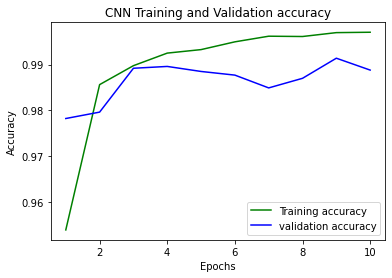

In [7]:
y_train2 = to_categorical(y_train)
y_test2 = to_categorical(y_test)
y_my2=to_categorical(y_my)
epochs=10
history2=model2.fit(x=x_train2, y=y_train2, epochs=epochs,validation_data=(x_test2, y_test2))

loss_train = history2.history['accuracy']
loss_val = history2.history['val_accuracy']
epochs = range(1,epochs+1)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('CNN Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Testing the CNN with my digits

CNN accuracy with my digits: 
1/1 [==============================] - 0s 2ms/step - loss: 0.0046 - accuracy: 1.0000
 


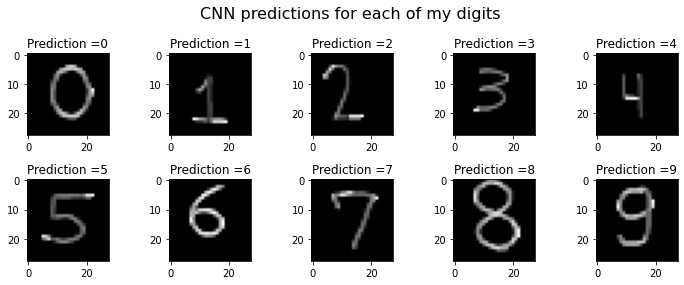

In [8]:
print('CNN accuracy with my digits: ')
model2.evaluate(x_my2, y_my2)
print(' ')

num_row=2
num_col=5
fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_col,2*num_row))
fig.suptitle('CNN predictions for each of my digits'
            , fontsize=16)
pred_model2=[]
for i in range(0,10):
    pred = model2.predict(x_my[i].reshape(1, 28, 28, 1))
    pred_model2.append(pred.argmax())
    ax = axes[i//num_col, i%num_col]
    ax.set_title( 'Prediction =' +str(pred_model2[i]))
    fig.tight_layout()
    ax.imshow(x_my[i], cmap='gray')

### How shifting a digit can affect the predictions of  the FCNN and the CNN?

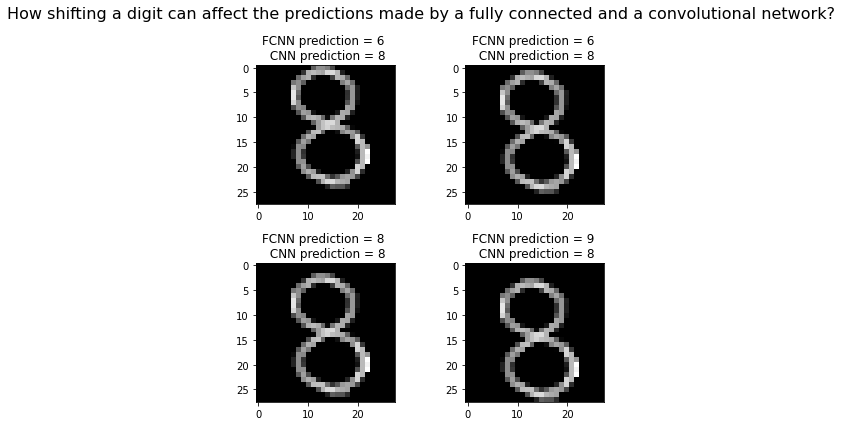

In [9]:
#Shifting the digit 8
number_8_shifted=np.zeros((4,28,28))
array=x_my[8]
i=0
while i < 4:
    number_8_shifted[i]=array
    row_to_move=array[27]
    array=np.delete(array,27,0)
    array=np.concatenate(([row_to_move],array),axis=0)
    i=i+1
    
#Plotting all the digits 8 shifted and observing the its predictions from model 1(fully connected network) 
#and model 2(convolutional network)   
num_row=2
num_col=2
pred_1=[]
pred_2=[]
fig, axes = plt.subplots(num_row, num_col, figsize=(3*num_col,3*num_row))
fig.suptitle('How shifting a digit can affect the predictions made by a fully connected and a convolutional network?'
            , fontsize=16)
#fig.text('Ai AI AI')
for i in range(4):
    pred1 = model1.predict(number_8_shifted[i].reshape(1, 28, 28, 1))
    pred_1.append(pred1.argmax())
    pred2 = model2.predict(number_8_shifted[i].reshape(1, 28, 28, 1))
    pred_2.append(pred2.argmax())
    ax = axes[i//num_col, i%num_col]
    ax.imshow(number_8_shifted[i], cmap='gray')
    ax.set_title( 'FCNN prediction = '+str(pred_1[i]) + 
                 ' \n CNN prediction = '+str(pred_2[i]))
plt.tight_layout()
plt.show()